# 학습 데이터 분리

In [342]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/2020가계부채/data_fin.csv', engine='python')
# df=df.drop(columns='Unnamed: 0')
df.columns

Index(['Unnamed: 0', '담보대출_대출용도_거주주택 구입', '담보대출_대출용도_거주주택이외 부동산 구입',
       '담보대출_대출용도_전(월)세 보증금 마련', '담보대출_대출용도_사업자금 마련', '담보대출_대출용도_생활비 마련',
       '담보대출_대출기관_은행(2010년은 농수협 중앙회 제외)', '담보대출_대출기관_저축은행',
       '담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)', '신용대출_대출용도_거주주택 구입',
       '신용대출_대출용도_거주주택이외 부동산 구입', '신용대출_대출용도_전(월)세 보증금 마련',
       '신용대출_대출용도_사업자금 마련', '신용대출_대출용도_생활비 마련',
       '신용대출_대출기관_은행(2010년은 농수협 중앙회 제외)', '신용대출_대출기관_저축은행',
       '신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함)', '자산', '부채', '순자산액', '가구주 은퇴여부',
       '가구주 성별', '가구주교육정도 통합별', '가구주 혼인상태', '입주형태', '수도권여부', '가구주 직업(대분류)',
       '가구주 종사상지위', '부실가계'],
      dtype='object')

In [318]:
df=df.drop(['순자산액','가구주 혼인상태','가구주 직업(대분류)'],axis=1)
df

,Unnamed: 0,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),담보대출_대출기관_저축은행,담보대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출용도_거주주택 구입,...,신용대출_대출용도_사업자금 마련,신용대출_대출용도_생활비 마련,신용대출_대출기관_은행(2010년은 농수협 중앙회 제외),신용대출_대출기관_저축은행,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),가구주 성별,가구주교육정도 통합별,입주형태,수도권여부,부실가계
0,0,0,0.0,1,0.0,0,1.0,0,0.0,0,...,1,0,1.0,0,0,1,1,0,1,0
1,1,0,0.0,0,1.0,0,1.0,0,0.0,0,...,1,0,0.0,1,0,1,1,0,1,0
2,2,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0,0,1,0,0,1,0
3,3,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0,0,1,0,0,1,0
4,4,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18059,18059,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,1,0.0,0,0,1,1,0,0,0
18060,18060,1,0.0,0,0.0,0,1.0,1,0.0,0,...,0,0,0.0,0,0,1,1,1,0,1
18061,18061,1,0.0,0,0.0,0,1.0,0,0.0,0,...,0,0,0.0,0,0,1,1,1,0,1
18062,18062,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0,0,1,1,0,0,0


In [343]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

# 학습과 테스트 데이터 셋으로 분리
X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=369, stratify=Y)

In [344]:
#X_train

# SMOTE 이전 모델

In [345]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [346]:
# df.info()

In [347]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    86.53907
1    13.46093
Name: 부실가계, dtype: float64
테스트 데이터 레이블 값 비율
0    86.531365
1    13.468635
Name: 부실가계, dtype: float64


In [348]:
# print(y_train.value_counts())
# print(y_test.value_counts())

print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())

SMOTE 적용 전 레이블 값 분포: 
 0    10942
1     1702
Name: 부실가계, dtype: int64


In [349]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# get_clf_eval 함수로 성능지표들 한눈에 보기

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    
# get_model_train_eval 함수로 모델 학습과 성능지표(get_clf_eval)한번에 해결
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)    

In [350]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, dt_pred)

오차 행렬
[[4085  605]
 [ 513  217]]
정확도: 0.7937, 정밀도: 0.2640, 재현율: 0.2973,    F1: 0.2796, AUC:0.5841


In [351]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

# get_model_train_eval 함수이용하여 학습 및 평가까지 한번에
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[4432  258]
 [ 590  140]]
정확도: 0.8435, 정밀도: 0.3518, 재현율: 0.1918,    F1: 0.2482, AUC:0.5684


In [352]:
from sklearn.linear_model import LogisticRegression

# LogisticRegresstion
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

# get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[4652   38]
 [ 697   33]]
정확도: 0.8644, 정밀도: 0.4648, 재현율: 0.0452,    F1: 0.0824, AUC:0.5186


In [353]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기 생성
knn_clf = KNeighborsClassifier(n_neighbors=7)

get_model_train_eval(knn_clf, ftr_train=X_train, ftr_test=X_test,
                  tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[4557  133]
 [ 657   73]]
정확도: 0.8542, 정밀도: 0.3544, 재현율: 0.1000,    F1: 0.1560, AUC:0.5358


# SMOTE 이후 모델

In [354]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=369)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (12644, 27) (12644,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (21884, 27) (21884,)
SMOTE 적용 후 레이블 값 분포: 
 0    10942
1    10942
Name: 부실가계, dtype: int64


In [355]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

# precision_recall_curve_plot 함수를 통해 정밀도와 재현율 관계 시각화

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

## 결정트리

In [356]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)
get_model_train_eval(dt_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[3987  703]
 [ 513  217]]
정확도: 0.7756, 정밀도: 0.2359, 재현율: 0.2973,    F1: 0.2630, AUC:0.5737


In [357]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369, max_depth=4, min_samples_split=2)
get_model_train_eval(dt_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[3890  800]
 [ 366  364]]
정확도: 0.7849, 정밀도: 0.3127, 재현율: 0.4986,    F1: 0.3844, AUC:0.6640


In [289]:
#  하이퍼 파라미터 추출
print('DT 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DT 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 369, 'splitter': 'best'}


In [290]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3,4,5]}

grid_dt = GridSearchCV(dt_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7622


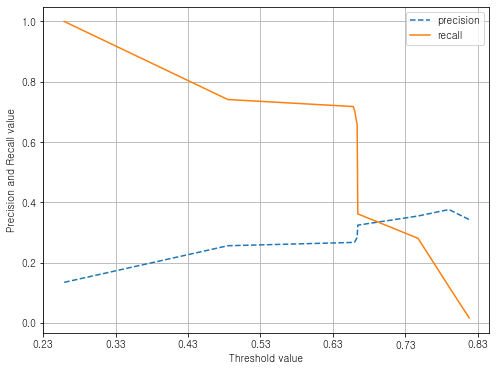

In [334]:
precision_recall_curve_plot( y_test, dt_clf.predict_proba(X_test)[:, 1] )

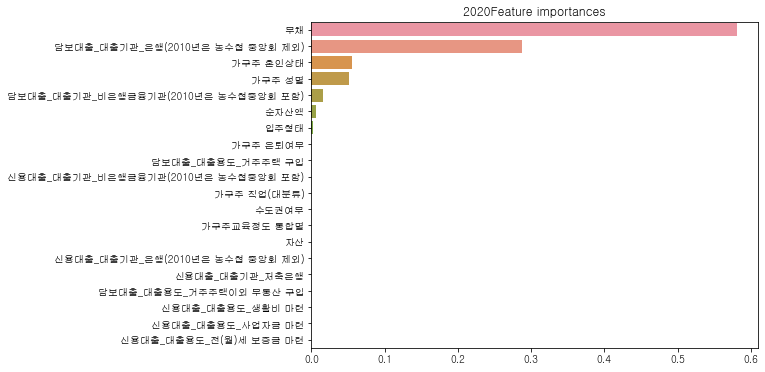

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('2020Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## LGBM

In [359]:
lgbm_clf = LGBMClassifier()
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[4337  353]
 [ 545  185]]
정확도: 0.8343, 정밀도: 0.3439, 재현율: 0.2534,    F1: 0.2918, AUC:0.5891


In [360]:
lgbm_clf = LGBMClassifier(learning_rate= 0.01, max_depth=7)

get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[4077  613]
 [ 421  309]]
정확도: 0.8092, 정밀도: 0.3351, 재현율: 0.4233,    F1: 0.3741, AUC:0.6463


In [303]:
#  하이퍼 파라미터 추출
print('LGBM 기본 하이퍼 파라미터:\n', lgbm_clf.get_params())

LGBM 기본 하이퍼 파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': 7, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [304]:
# GridSearchCV
# learning_rate: 훈련량
# max_depth: 나무 깊이로 많은 feature가 있을 수록 더 높게 설정, default=-1로 제한없음을 의미

parameters = {'max_depth':[1,2,3,4,5,6,7], 'learning_rate':[0.01,0.1]}

grid_dt = GridSearchCV(lgbm_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.01, 'max_depth': 7}
GridSearchCV 최고 정확도: 0.7720


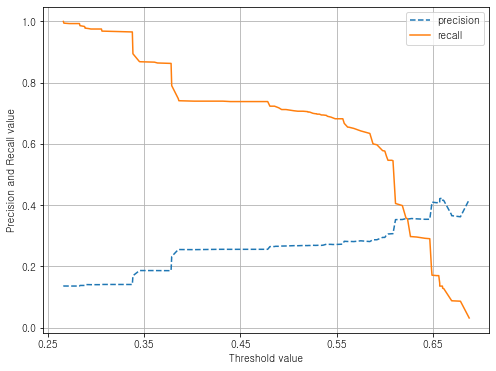

In [264]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:, 1] )

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

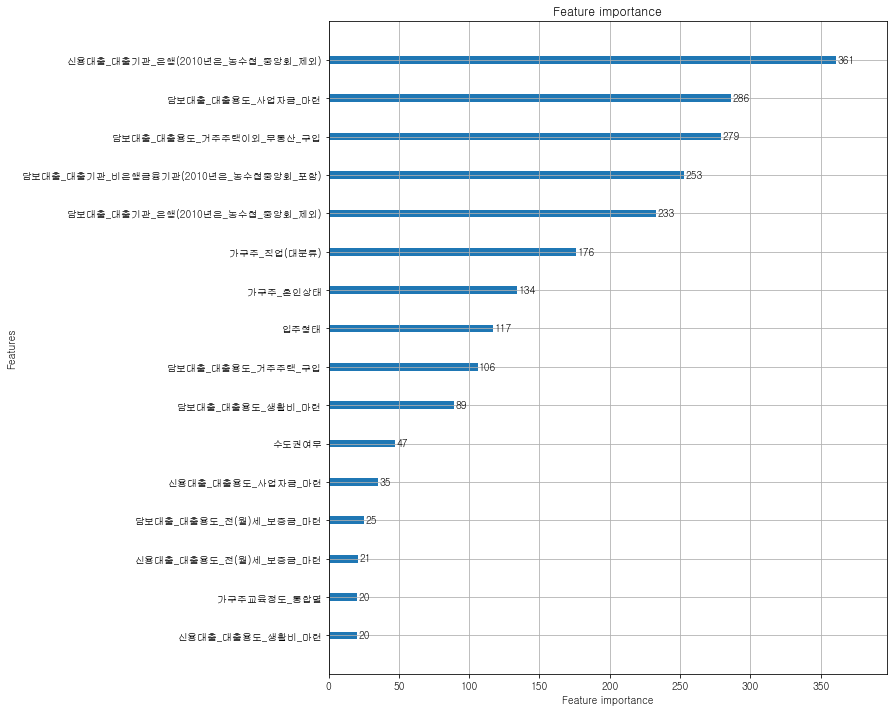

In [265]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plt.title('2020Feature importances')
plot_importance(lgbm_clf, ax=ax)

- 스케일링 필요한 알고리즘 스케일링 종류별 적용해보기

In [310]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)       # fit은 train 피처 값에만(훈련 데이터가 스케일링의 기준값이 된다)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [361]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [362]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=369)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (12644, 27) (12644,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (21884, 27) (21884,)
SMOTE 적용 후 레이블 값 분포: 
 0    10942
1    10942
Name: 부실가계, dtype: int64


## 로지스틱 회귀

In [363]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[3364 1326]
 [ 223  507]]
정확도: 0.7142, 정밀도: 0.2766, 재현율: 0.6945,    F1: 0.3956, AUC:0.7059


In [368]:
lr_clf = LogisticRegression(C=0.01, penalty='none')
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[3374 1316]
 [ 222  508]]
정확도: 0.7162, 정밀도: 0.2785, 재현율: 0.6959,    F1: 0.3978, AUC:0.7076


In [260]:
#  하이퍼 파라미터 추출
print('로지스티 회귀 기본 하이퍼 파라미터:\n', lr_clf.get_params())

로지스티 회귀 기본 하이퍼 파라미터:
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [81]:
# GridSearchCV
# penalty는 규제의 유형을 설정하는 것이고, C는 규제 강도를 조절하는 alpha값의 역수 이다. 즉 , C = 1/alpha 이다

parameters = { "penalty" : ["l2", "none"], "C" : [0.01, 0.1, 1, 5, 10] }

grid_dt = GridSearchCV(lr_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'C': 0.01, 'penalty': 'none'}
GridSearchCV 최고 정확도: 0.5503


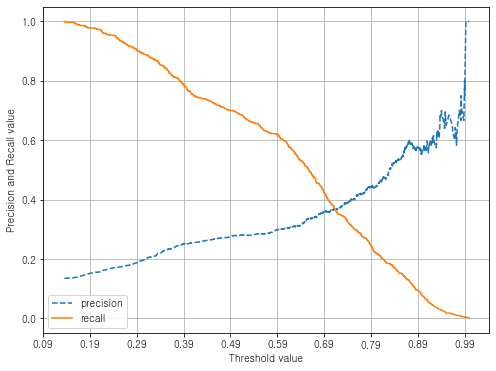

In [365]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

# K-nn

In [366]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기 생성
knn_clf = KNeighborsClassifier(n_neighbors=9)

get_model_train_eval(knn_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[3571 1119]
 [ 342  388]]
정확도: 0.7304, 정밀도: 0.2575, 재현율: 0.5315,    F1: 0.3469, AUC:0.6465


In [341]:
#  하이퍼 파라미터 추출
print('KNN 기본 하이퍼 파라미터:\n', knn_clf.get_params())

KNN 기본 하이퍼 파라미터:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [113]:
# GridSearchCV

parameters = { "n_neighbors" : [3,5,7,9,11] }

grid_dt = GridSearchCV(knn_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'n_neighbors': 7}
GridSearchCV 최고 정확도: 0.8391


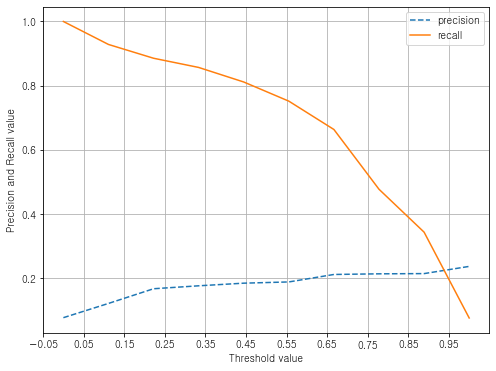

In [185]:
precision_recall_curve_plot( y_test, knn_clf.predict_proba(X_test)[:, 1] )

# SVM - 참고용

In [314]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC(kernel = 'linear')
get_model_train_eval(svm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[3264 1426]
 [ 205  525]]
정확도: 0.6991, 정밀도: 0.2691, 재현율: 0.7192,    F1: 0.3916, AUC:0.7076


In [274]:
# SVM, kernel = 'rbf'로 비선형분리 진행
 
svm_clf =svm.SVC(kernel = 'rbf')
get_model_train_eval(svm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[1826  805]
 [ 157  132]]
정확도: 0.6705, 정밀도: 0.1409, 재현율: 0.4567,    F1: 0.2153, AUC:0.5754


In [272]:
#  하이퍼 파라미터 추출
print('SVM 기본 하이퍼 파라미터:\n', svm_clf.get_params())

SVM 기본 하이퍼 파라미터:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
